<center><h1>Neural Networks</h1></center>

# 1. Introduction

Neural networks are a fundamental concept in modern machine learning and artificial intelligence, inspired by the structure and function of the human brain. They consist of interconnected layers of neurons that process information in a hierarchical manner, enabling them to learn complex patterns from data.

At their core, neural networks use **weighted connections** and **activation functions** to transform inputs into meaningful outputs. By adjusting these weights through training algorithms such as **backpropagation** and **gradient descent**, neural networks can improve their performance on various tasks, including classification, regression, and pattern recognition.

Neural networks have gained widespread adoption due to their ability to handle high-dimensional and unstructured data, such as **images, text, and audio**. With the advent of deep learning, deeper architectures like **Convolutional Neural Networks (CNNs)** and **Recurrent Neural Networks (RNNs)** have been developed to tackle complex problems in **computer vision, natural language processing,** and more.

In this notebook, we will explore the fundamental concepts of neural networks, covering their **architecture, training process, and key applications**. Through hands-on implementations, we will gain a deeper understanding of how neural networks work and how they can be applied to real-world problems.


![Neural Networks](NeuralNetworks.webp)

# 2. How Does Neural Networks Work?

Neural networks function by simulating the way biological neurons process and transmit information. They consist of layers of artificial neurons that perform mathematical operations on input data to extract meaningful patterns. The main components of a neural network include:

## 1. Neurons and Layers
A neural network is composed of multiple layers:

- **Input Layer:** Receives raw data and passes it to the next layer.
- **Hidden Layers:** Perform computations and extract features using weighted connections and activation functions. The depth of a network depends on the number of hidden layers.
- **Output Layer:** Produces the final prediction or classification result.

## 2. Weights and Biases
Each connection between neurons has an associated **weight**, which determines the strength of the connection. Additionally, each neuron has a **bias** that allows the model to shift the activation threshold, improving flexibility in learning. The goal of training a neural network is to adjust these weights and biases to minimize prediction errors.

## 3. Activation Functions
Activation functions introduce non-linearity, enabling the network to learn complex patterns. Common activation functions include:

- **Sigmoid:** $$\sigma(x) = \frac{1}{1 + e^{-x}}$$ (Useful for probabilities)
- **ReLU (Rectified Linear Unit):** $$f(x) = \max(0, x)$$ (Speeds up training)
- **Tanh:** $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$ (Ranges between -1 and 1)

## 4. Forward Propagation
In forward propagation, input data passes through the network layer by layer, where each neuron applies weights, biases, and activation functions to compute the output. Mathematically, this can be represented as:

$$
\text{Output} = \text{Activation} (W \cdot X + b)
$$

where:
- $X$ is the input vector,
- $W$ is the weight matrix,
- $b$ is the bias term,
- The activation function introduces non-linearity.

## 5. Loss Function
After generating an output, the network evaluates how far its prediction is from the actual target using a **loss function**. Common loss functions include:

- **Mean Squared Error (MSE):** For regression problems.
- **Cross-Entropy Loss:** For classification problems.

## 6. Backpropagation and Gradient Descent
To improve accuracy, the network adjusts its weights using **backpropagation**, which computes the gradient of the loss function with respect to each weight using the **chain rule of calculus**. The weights are then updated using **gradient descent**:

$$
W_{\text{new}} = W_{\text{old}} - \alpha \frac{\partial L}{\partial W}
$$

where $\alpha$ (learning rate) controls how much weights are updated in each step.

## 7. Training Process
Neural networks are trained in an iterative process:
1. **Initialize** weights and biases.
2. **Feedforward:** Compute output for given input data.
3. **Compute loss:** Measure error between predicted and actual values.
4. **Backpropagate:** Adjust weights using gradient descent.
5. **Repeat** steps 2-4 until the loss converges to a minimum.

## 8. Final Prediction
After training, the model can generalize learned patterns to new data and make predictions with high accuracy.

---

# 3. About the Yelp Reviews Dataset

## Context
This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the **Yelp Dataset Challenge**, which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the most recent dataset, you'll find information about businesses across 8 metropolitan areas in the USA and Canada.

## Files:

### **yelp_academic_dataset_business.json**:
This file typically contains information about businesses listed on Yelp, including details like:
- Business name
- Location
- Categories
- Ratings
- Reviews count

### **yelp_academic_dataset_checkin.json**:
This file usually holds check-in data, which indicates how many times users have checked into various businesses. It helps track business popularity over time.

### **yelp_academic_dataset_review.json**:
This is the main file for text analysis, containing reviews from users. It includes the following:
- Review IDs
- User IDs
- Business IDs
- Review text
- Rating
- Timestamps

---

# 4. Steps to Apply Neural Networks to Dataset

## Step 1. Load the Dataset

First, we load the `yelp_academic_dataset_review.json` file using **pandas**. Since the reviews are stored in JSON format, we will use the `read_json` function.


In [4]:
import pandas as pd

# Load a small sample of the review dataset
review_df = pd.read_json('yelp_academic_dataset_review.json', lines=True, nrows=10000)

# Show the first few rows
review_df.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


## Step 2: Data Preprocessing

Before we can train a neural network model, we need to preprocess the data. The preprocessing steps include creating sentiment labels, cleaning the text data, tokenizing the text, and padding the sequences.

### 1. Sentiment Label
We will create a binary sentiment label based on the `stars` column. Reviews with a rating of 4 or 5 will be labeled as positive, and ratings of 1 or 2 will be labeled as negative. Reviews with a rating of 3 can be either ignored or treated as neutral, depending on your preference.


In [5]:
# Create a binary sentiment column: 1 for positive, 0 for negative
review_df['sentiment'] = review_df['stars'].apply(lambda x: 1 if x > 3 else 0)

### 2. Text Cleaning

We will clean the review text by removing special characters and converting all text to lowercase. This process helps standardize the text and removes unnecessary noise, making it more suitable for further analysis or model training.


In [6]:
import re
import string

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using regular expressions
    text = re.sub(f"[{string.punctuation}]", '', text)

    return text

# Apply the text cleaning function to the review text column
review_df['cleaned_text'] = review_df['text'].apply(clean_text)

### 3. Tokenization

Next, we will tokenize the review text using Keras' `Tokenizer` class. Tokenization converts each word in the text into a unique integer. These integers represent the words and can be used as input to a neural network model for training.



In [9]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/376.0 MB 13.1 MB/s eta 0:00:29
    --------------------------------------- 5.5/376.0 MB 15.3 MB/s eta 0:00:25
    --------------------------------------- 8.7/376.0 MB 15.3 MB/s eta 0:00:24
   - -------------------------------------- 12.1/376.0 MB 15.4 MB/s eta 0:00:24
   - -------------------------------------- 15.2/376.0 MB 15.4 MB/s eta 0:00:24
   - -------------------------------------- 17.6/376.0 MB 14.8 MB/s eta 0:00:25
   -- -----------------

  You can safely remove it manually.
  You can safely remove it manually.


In [11]:
!pip install --upgrade numpy


  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the Tokenizer with a specified number of words (e.g., top 5000 most frequent words)
tokenizer = Tokenizer(num_words=5000)

# Fit the tokenizer on the cleaned review text
tokenizer.fit_on_texts(review_df['cleaned_text'])

# Convert the text to sequences of integers
X = tokenizer.texts_to_sequences(review_df['cleaned_text'])

### 4. Padding
After tokenization, the sequences (lists of integers) may have varying lengths. To ensure that all input sequences are the same length, we will pad them to a fixed length using Keras' `pad_sequences` function. Padding adds zeros at the beginning or end of the sequences to make them uniform in length, which is necessary for inputting them into a neural network.

We will use the `maxlen` parameter to define the desired length of the sequences and the `padding` parameter to specify where to add the padding (either 'pre' or 'post').


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the sequences to ensure they are of equal length
X = pad_sequences(X, padding='post', maxlen=100)  # Adjust maxlen as needed


In [17]:
from sklearn.model_selection import train_test_split
# Get the sentiment labels
y = review_df['sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 3. Build the Neural Network

Now, let’s build a simple Neural Network using Keras. We’ll use an Embedding layer to convert text into vectors, and then an LSTM layer for sequence processing.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

# Build the model
model = Sequential()

# Embedding layer for converting words into vectors
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))

# LSTM layer for handling sequence data
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))  # Dropout for regularization

# Adding another LSTM layer
model.add(LSTM(64))

# Dense output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


C:\Users\thinkbook14\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Step 4. Train the Neural Network

We can now train the model using the training data.

In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.6959 - loss: 0.6053 - val_accuracy: 0.7415 - val_loss: 0.5635
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.7266 - loss: 0.5639 - val_accuracy: 0.7630 - val_loss: 0.5391
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.8009 - loss: 0.4683 - val_accuracy: 0.7590 - val_loss: 0.4575
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.7990 - loss: 0.4810 - val_accuracy: 0.7725 - val_loss: 0.5380
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.7959 - loss: 0.4818 - val_accuracy: 0.7975 - val_loss: 0.4947


## Step 5. Evaluate the Model

After training, we’ll evaluate the model on the test set to check its performance.



In [20]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8086 - loss: 0.4873
Test Accuracy: 79.75%


## Step 6. Visualize the Training Process

It’s often useful to visualize the training and validation loss/accuracy over epochs to understand the model’s performance.



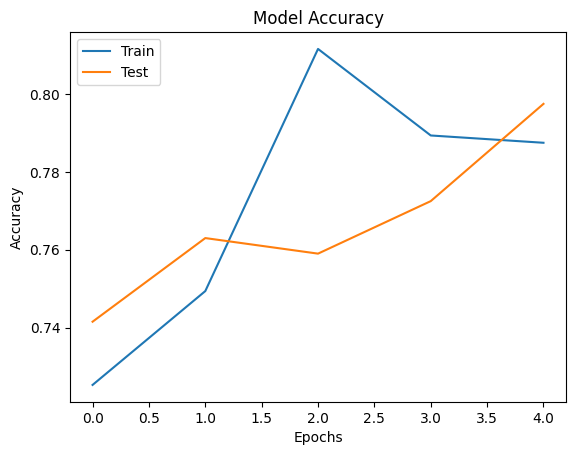

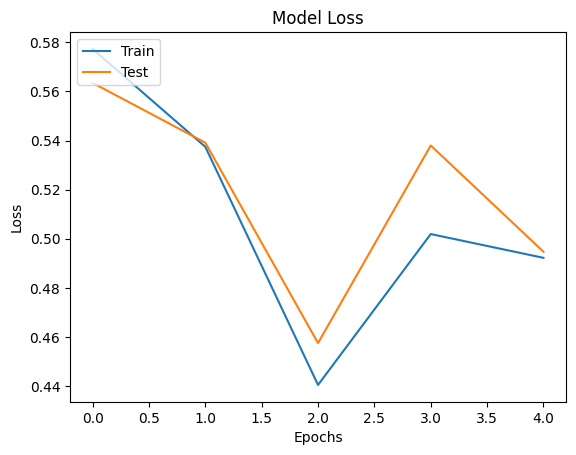

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Step 7. Making Predictions

Once the model is trained, you can use it to make predictions on new reviews. Here's how to predict the sentiment of a single review.

In [22]:
# Example review
sample_review = ["The food was fantastic and the service was great!"]
sample_review = tokenizer.texts_to_sequences(sample_review)
sample_review = pad_sequences(sample_review, maxlen=100, padding='post')

# Predict sentiment
prediction = model.predict(sample_review)
print("Positive Review" if prediction[0] > 0.5 else "Negative Review")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Positive Review


## Conclusion

In this project, we successfully built a neural network model to analyze Yelp review data and predict sentiment based on user reviews. We started by loading a portion of the Yelp dataset, followed by preprocessing steps such as text cleaning, tokenization, and padding to ensure all review texts were standardized for input into the model.

We then used a neural network architecture to classify reviews into positive or negative sentiment, based on the ratings provided. Throughout the process, we handled challenges related to large data sizes, performance optimization, and ensuring the model could process text data effectively.

By splitting the data into training and testing sets, we trained the model, monitored its performance during validation, and obtained results that help us evaluate the model’s ability to predict sentiment from Yelp reviews.

Future improvements could include experimenting with different neural network architectures, such as using pre-trained word embeddings or exploring more advanced text processing techniques, to further enhance the model's accuracy and robustness.
